# Using Gensim to create word embeddings.

## Dr. Tristan Behrens.

In this notebook we will use Gensim to create word embeddings from a corpus.

Word embedding are just fantastic. In a nutshell, they map words to vectors. And with vectors, as we all know, you can do math.

- [Wikipedia: Word Embedding](https://en.wikipedia.org/wiki/Word_embedding).

---

Firstly, we download the corpus. We download the entire Harry Potter collection. Feel free, to use your own corpus.

In [10]:
#!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt"
#!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%202%20-%20The%20Chamber%20of%20Secrets.txt"
#!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%203%20-%20The%20Prisoner%20of%20Azkaban.txt"
#!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%204%20-%20The%20Goblet%20of%20Fire.txt"
#!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%205%20-%20The%20Order%20of%20the%20Phoenix.txt"
#!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%206%20-%20The%20Half%20Blood%20Prince.txt"
#!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%207%20-%20The%20Deathly%20Hallows.txt"

!wget -nc "https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20The%20Half-Blood%20Prince.txt"
!wget -nc "https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Chamber%20of%20Secrets.txt"
!wget -nc "https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Deathly%20Hallows%20.txt"
!wget -nc "https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Goblet%20of%20Fire.txt"
!wget -nc "https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Order%20of%20the%20Phoenix.txt"
!wget -nc "https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Prisoner%20of%20Azkaban%20.txt"
!wget -nc "https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Sorcerer's%20Stone.txt"

File ‘Harry Potter and The Half-Blood Prince.txt’ already there; not retrieving.

File ‘Harry Potter and the Chamber of Secrets.txt’ already there; not retrieving.

File ‘Harry Potter and the Deathly Hallows .txt’ already there; not retrieving.

File ‘Harry Potter and the Goblet of Fire.txt’ already there; not retrieving.

File ‘Harry Potter and the Order of the Phoenix.txt’ already there; not retrieving.

File ‘Harry Potter and the Prisoner of Azkaban .txt’ already there; not retrieving.

File ‘Harry Potter and the Sorcerer's Stone.txt’ already there; not retrieving.



In [11]:
!ls

 01_deep_learning_for_nlp.ipynb
 02_intro_to_nlp.ipynb
 03_Gensim.ipynb
 best_model
 best_model.h5
'Harry Potter and the Chamber of Secrets.txt'
'Harry Potter and the Deathly Hallows .txt'
'Harry Potter and the Goblet of Fire.txt'
'Harry Potter and The Half-Blood Prince.txt'
'Harry Potter and the Order of the Phoenix.txt'
'Harry Potter and the Prisoner of Azkaban .txt'
"Harry Potter and the Sorcerer's Stone.txt"


## Import all necessary modules.

In [12]:
import os
import logging
import os
import multiprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/solaris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Train Gensim.

Here we feed all the text data into Gensim to train Word2Vec.

- [Gensim homepage](https://radimrehurek.com/gensim/).
- [Wikipedia: Word2Vec](https://en.wikipedia.org/wiki/Word2vec).

In [13]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __init__(self):
        self.lines = []

        files = os.listdir(".")
        files = [file for file in files if file.endswith(".txt")]
        print(f"Found {len(files)} files")

        for file in files:
            for line in open(file):
                self.lines += [line]
        print(f"Got {len(self.lines)} lines.")

    def __iter__(self):
        for line in self.lines:
            preprocessed_line = utils.simple_preprocess(line)
            yield preprocessed_line

In [14]:
import gensim.models

sentences = MyCorpus()

model = gensim.models.Word2Vec(
    sentences=sentences,
    sg=1,
    vector_size=300,
    window=20,
    min_count=3,
    workers=multiprocessing.cpu_count()
)

print("Done.")

Found 7 files
Got 59201 lines.
Done.


## Find most similar words.

With vectors it is easy to find the nearest neighbours.

Note: Feel free to experiment with your own words.

In [15]:
model.wv.most_similar("stupefy", topn=20)

[('petrificus', 0.9174898862838745),
 ('totalus', 0.9091026186943054),
 ('impedimenta', 0.8856207132339478),
 ('slashing', 0.868669331073761),
 ('keeled', 0.8659660816192627),
 ('lunged', 0.8648496270179749),
 ('flailing', 0.8615251779556274),
 ('howl', 0.8605797290802002),
 ('swerved', 0.8564509749412537),
 ('smack', 0.850090742111206),
 ('streak', 0.8499598503112793),
 ('duelling', 0.8499546051025391),
 ('sectumsempra', 0.8496427536010742),
 ('protego', 0.8489977121353149),
 ('jets', 0.8488532304763794),
 ('writhing', 0.8473793864250183),
 ('wriggling', 0.8453574180603027),
 ('sidecar', 0.8406972885131836),
 ('excruciating', 0.8341826796531677),
 ('tripped', 0.8306046724319458)]

## Plot word similarities.

That was just one word. Let us generate a similarity matrix of a lot of words. Again, use your own.

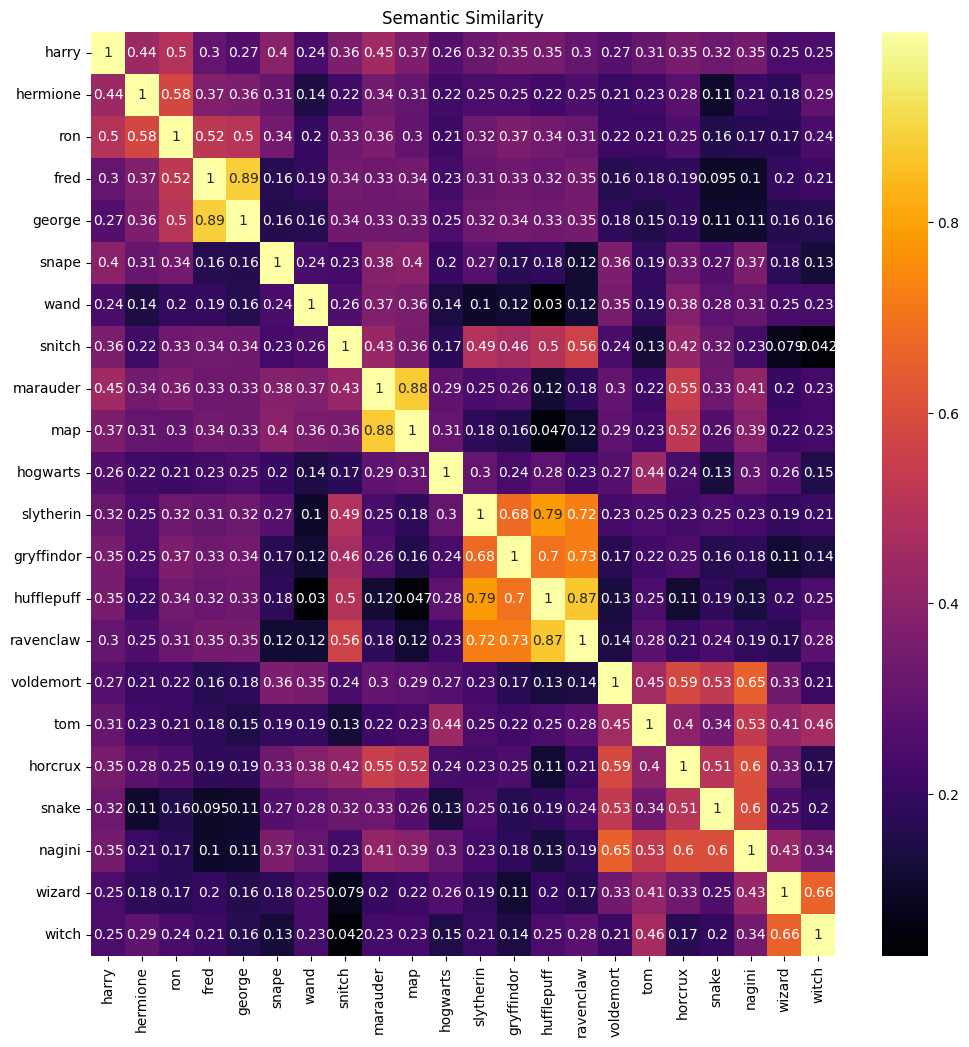

In [16]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]

    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(12, 12))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity")

words = [
    "harry",
    "hermione",
    "ron",
    "fred",
    "george",
    "snape",
    "wand",
    "snitch",
    "marauder",
    "map",
    "hogwarts",
    "slytherin",
    "gryffindor",
    "hufflepuff",
    "ravenclaw",
    "voldemort",
    "tom",
    "horcrux",
    "snake",
    "nagini",
    "wizard",
    "witch"
]
plot_similarities(words)

# Thank you!